# Can you predict which NBA players will make the "All-Star" team?
*Yes! Let's do it!*

## Part one: Clean the data

#### Import libraries

In [1]:
# !pip install seaborn --upgrade
import pandas as pd
import numpy as np
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

#### Load 'player_data.csv' 

In [2]:
player_data = pd.read_csv("player_data.csv", delimiter=",")

In [3]:
player_data.shape

(24691, 30)

In [4]:
player_data.dtypes

Unnamed: 0      int64
Year          float64
Player         object
Pos            object
Age           float64
Tm             object
G             float64
PER           float64
TS%           float64
ORB%          float64
DRB%          float64
TRB%          float64
AST%          float64
STL%          float64
BLK%          float64
TOV%          float64
WS            float64
BPM           float64
VORP          float64
FG%           float64
3P%           float64
2P%           float64
eFG%          float64
FT%           float64
TRB           float64
AST           float64
STL           float64
BLK           float64
TOV           float64
PTS           float64
dtype: object

In [5]:
pd.options.display.max_columns = None
player_data.sample(5)

Unnamed: 0    Year           Player Pos   Age   Tm     G   PER    TS%  \
2757         2757  1969.0      Joe Kennedy  SF  22.0  SEA  72.0   9.1  0.450   
2903         2903  1970.0  Dick Cunningham   C  23.0  MIL  60.0   9.7  0.405   
21078       21078  2011.0      Luke Walton  SF  30.0  LAL  54.0   5.1  0.378   
2815         2815  1969.0   Flynn Robinson  PG  27.0  CHI  18.0  18.6  0.500   
21468       21468  2012.0      Eric Maynor  PG  24.0  OKC   9.0   9.1  0.466   

       ORB%  DRB%  TRB%  AST%  STL%  BLK%  TOV%   WS  BPM  VORP    FG%    3P%  \
2757    NaN   NaN   NaN   6.4   NaN   NaN   NaN  0.5  NaN   NaN  0.395    NaN   
2903    NaN   NaN   NaN   7.8   NaN   NaN   NaN  0.0  NaN   NaN  0.369    NaN   
21078   2.2  13.1   7.8  18.0   1.0   0.6  20.5 -0.2 -6.2  -0.5  0.328  0.235   
2815    NaN   NaN   NaN  16.6   NaN   NaN   NaN  1.6  NaN   NaN  0.423    NaN   
21468   2.7   7.8   5.4  24.1   1.9   0.0  21.3  0.1 -4.0  -0.1  0.359  0.353   

         2P%   eFG%    FT%    TRB   AST  STL  BLK   TOV    PTS  
2757   0.395  0.395  0.790  241.0  60.0  NaN  NaN   NaN  446.0  
2903   0.369  0.369  0.667  160.0  28.0  NaN  NaN   NaN  126.0  
21078  0.366  0.362  0.700   67.0  62.0  9.0  4.0  31.0   91.0  
2815   0.423  0.423  0.833   69.0  57.0  NaN  NaN   NaN  343.0  
21468  0.364  0.436  1.000   13.0  22.0  5.0  0.0  11.0   38.0

#### Drop the first column

In [6]:
player_data.drop(player_data.columns[0],axis=1,inplace=True)
player_data.head(3)

Year           Player  Pos   Age   Tm     G  PER    TS%  ORB%  DRB%  \
0  1950.0  Curly Armstrong  G-F  31.0  FTW  63.0  NaN  0.368   NaN   NaN   
1  1950.0     Cliff Barker   SG  29.0  INO  49.0  NaN  0.435   NaN   NaN   
2  1950.0    Leo Barnhorst   SF  25.0  CHS  67.0  NaN  0.394   NaN   NaN   

   TRB%  AST%  STL%  BLK%  TOV%   WS  BPM  VORP    FG%  3P%    2P%   eFG%  \
0   NaN   NaN   NaN   NaN   NaN  3.5  NaN   NaN  0.279  NaN  0.279  0.279   
1   NaN   NaN   NaN   NaN   NaN  2.2  NaN   NaN  0.372  NaN  0.372  0.372   
2   NaN   NaN   NaN   NaN   NaN  3.6  NaN   NaN  0.349  NaN  0.349  0.349   

     FT%  TRB    AST  STL  BLK  TOV    PTS  
0  0.705  NaN  176.0  NaN  NaN  NaN  458.0  
1  0.708  NaN  109.0  NaN  NaN  NaN  279.0  
2  0.698  NaN  140.0  NaN  NaN  NaN  438.0

#### Remove null values from "Players" column

In [7]:
# Checking for Null values in the dataframe. Looks like there are 67 "empty" rows.
player_data.isna().sum()

Year        67
Player      67
Pos         67
Age         75
Tm          67
G           67
PER        590
TS%        153
ORB%      3899
DRB%      3899
TRB%      3120
AST%      2136
STL%      3899
BLK%      3899
TOV%      5109
WS         106
BPM       3894
VORP      3894
FG%        166
3P%       9275
2P%        195
eFG%       166
FT%        925
TRB        379
AST         67
STL       3894
BLK       3894
TOV       5046
PTS         67
dtype: int64

In [8]:
# Removing Null values from Player column:
player_data = player_data.dropna(subset=['Player'])
player_data.isna().sum()

Year         0
Player       0
Pos          0
Age          8
Tm           0
G            0
PER        523
TS%         86
ORB%      3832
DRB%      3832
TRB%      3053
AST%      2069
STL%      3832
BLK%      3832
TOV%      5042
WS          39
BPM       3827
VORP      3827
FG%         99
3P%       9208
2P%        128
eFG%        99
FT%        858
TRB        312
AST          0
STL       3827
BLK       3827
TOV       4979
PTS          0
dtype: int64

#### Replace null values with 0's in the '3P%' column

In [9]:
player_data['3P%'].value_counts()

0.000    3638
0.333     591
0.250     417
0.500     336
0.200     330
         ... 
0.468       1
0.088       1
0.122       1
0.145       1
0.113       1
Name: 3P%, Length: 415, dtype: int64

In [10]:
# Replacing Null values with 0 which is also the Mode for 3P% column:
player_data['3P%'].fillna(0, inplace = True)

In [11]:
#Validating:
player_data['3P%'].isnull().sum()

0

#### Remove rows for players who made their debut before the 1980 season

In [12]:
# Creating list of Players who started their career before 1980
vet_players = []
for index, row in player_data.iterrows():
    if row.Year<1980:
        vet_players.append(row.Player)

In [13]:
# Removing duplicates
vet_players = set(vet_players)

In [14]:
player_data = player_data[~player_data.Player.isin(vet_players)]

In [15]:
#Validating. (As we can see, some Player names have an "*" at the end of the string):
player_data.head(3)

Year        Player Pos   Age   Tm     G   PER    TS%  ORB%  DRB%  \
5733  1980.0  James Bailey  PF  22.0  SEA  67.0  12.3  0.495  10.2  18.3   
5741  1980.0     Billy Ray  SG  23.0  POR  16.0  24.1  0.552   6.0   7.6   
5748  1980.0   Larry Bird*  PF  23.0  BOS  82.0  20.5  0.538   8.3  23.6   

      TRB%  AST%  STL%  BLK%  TOV%    WS  BPM  VORP    FG%    3P%    2P%  \
5733  14.3   5.3   1.4   4.1  20.0   1.0 -3.5  -0.3  0.450  0.000  0.450   
5741   6.8  23.8   2.9   0.5  10.9   0.9  3.3   0.3  0.493  0.421  0.504   
5748  16.0  18.5   2.3   1.0  14.0  11.2  5.3   5.4  0.474  0.406  0.481   

       eFG%    FT%    TRB    AST    STL   BLK    TOV     PTS  
5733  0.450  0.673  197.0   28.0   21.0  54.0   79.0   312.0  
5741  0.521  0.718   29.0   31.0   14.0   2.0   20.0   180.0  
5748  0.494  0.836  852.0  370.0  143.0  53.0  263.0  1745.0

#### Load in the 'all_star_appearances.pickle' file and use this data to create a column called 'all_star' that indicates whether or not a player made the All-Star team for a given year
- This file is a dictionary in which the keys are players who've made an All-Star team in their careers
- The values are all the years that the corresponding player made an All-Star team

#### Make sure this column is binary where 1 = Made All-Star team, and 0 = Did not make All-Star team

In [16]:
# Loading dictionary from Pickle file:
all_star_dict = pickle.load(open("all_star_appearances.pickle", "rb"))
all_star_dict

defaultdict(set,
            {'Julius Erving': {1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987},
             'Jack Sikma': {1980, 1981, 1982, 1983, 1984, 1985},
             'Dan Roundfield': {1980, 1981, 1982},
             'Dennis Johnson': {1980, 1981, 1982, 1985},
             'Tiny Archibald': {1980, 1981, 1982},
             'Kareem Abdul-Jabbar': {1980,
              1981,
              1982,
              1983,
              1984,
              1985,
              1986,
              1987,
              1988,
              1989},
             'Eddie Johnson': {1980, 1981},
             'Otis Birdsong': {1980, 1981, 1984},
             'Magic Johnson': {1980,
              1982,
              1983,
              1984,
              1985,
              1986,
              1987,
              1988,
              1989,
              1990,
              1991,
              1992},
             'Kermit Washington': {1980},
             'Bill Cartwright': {1980},
             'John Dr

In [17]:
# Removing asterisks from Player column to match Keys from dictionary:
player_data['Player'] = player_data['Player'].str.replace('*', '')
player_data.head(3)

Year        Player Pos   Age   Tm     G   PER    TS%  ORB%  DRB%  \
5733  1980.0  James Bailey  PF  22.0  SEA  67.0  12.3  0.495  10.2  18.3   
5741  1980.0     Billy Ray  SG  23.0  POR  16.0  24.1  0.552   6.0   7.6   
5748  1980.0    Larry Bird  PF  23.0  BOS  82.0  20.5  0.538   8.3  23.6   

      TRB%  AST%  STL%  BLK%  TOV%    WS  BPM  VORP    FG%    3P%    2P%  \
5733  14.3   5.3   1.4   4.1  20.0   1.0 -3.5  -0.3  0.450  0.000  0.450   
5741   6.8  23.8   2.9   0.5  10.9   0.9  3.3   0.3  0.493  0.421  0.504   
5748  16.0  18.5   2.3   1.0  14.0  11.2  5.3   5.4  0.474  0.406  0.481   

       eFG%    FT%    TRB    AST    STL   BLK    TOV     PTS  
5733  0.450  0.673  197.0   28.0   21.0  54.0   79.0   312.0  
5741  0.521  0.718   29.0   31.0   14.0   2.0   20.0   180.0  
5748  0.494  0.836  852.0  370.0  143.0  53.0  263.0  1745.0

In [18]:
# Creating Temporary column with Years (Values) for each Player (Key):
player_data["temp_col"] = player_data["Player"].map(all_star_dict)

In [19]:
# Mapping each row to the Player and Year when they were included in the All-Star Team:
player_data['all_star'] = player_data.apply(
    lambda row: 1 if (row['Year'] in row['temp_col']) else 0,
    axis=1
)

In [20]:
# Validating:
player_data.head(5)

Year           Player Pos   Age   Tm     G   PER    TS%  ORB%  DRB%  \
5733  1980.0     James Bailey  PF  22.0  SEA  67.0  12.3  0.495  10.2  18.3   
5741  1980.0        Billy Ray  SG  23.0  POR  16.0  24.1  0.552   6.0   7.6   
5748  1980.0       Larry Bird  PF  23.0  BOS  82.0  20.5  0.538   8.3  23.6   
5753  1980.0  Lawrence Boston  PF  23.0  WSB  13.0  12.6  0.485  15.1  16.2   
5759  1980.0   Dudley Bradley  SG  22.0  IND  82.0  13.5  0.502   3.4   8.1   

      TRB%  AST%  STL%  BLK%  TOV%    WS  BPM  VORP    FG%    3P%    2P%  \
5733  14.3   5.3   1.4   4.1  20.0   1.0 -3.5  -0.3  0.450  0.000  0.450   
5741   6.8  23.8   2.9   0.5  10.9   0.9  3.3   0.3  0.493  0.421  0.504   
5748  16.0  18.5   2.3   1.0  14.0  11.2  5.3   5.4  0.474  0.406  0.481   
5753  15.7   2.3   1.5   0.8  12.2   0.2 -4.7  -0.1  0.462  0.000  0.462   
5759   5.7  15.9   4.8   1.3  19.5   3.1  0.7   1.4  0.452  0.400  0.452   

       eFG%    FT%    TRB    AST    STL   BLK    TOV     PTS  \
5733  0.450  0.673  197.0   28.0   21.0  54.0   79.0   312.0   
5741  0.521  0.718   29.0   31.0   14.0   2.0   20.0   180.0   
5748  0.494  0.836  852.0  370.0  143.0  53.0  263.0  1745.0   
5753  0.462  0.615   39.0    2.0    4.0   2.0    8.0    56.0   
5759  0.453  0.782  223.0  252.0  211.0  48.0  166.0   688.0   

                                               temp_col  all_star  
5733                                                 {}         0  
5741                                                 {}         0  
5748  {1984, 1985, 1986, 1987, 1988, 1990, 1991, 199...         1  
5753                                                 {}         0  
5759                                                 {}         0

In [21]:
# Dropping temporary column:
player_data.drop('temp_col', axis=1, inplace=True)

## Part 2: Exploratory data analysis

#### Generate descriptive stats for the features

In [22]:
player_data.describe()

Year           Age             G           PER           TS%  \
count  17408.000000  17408.000000  17408.000000  17403.000000  17332.000000   
mean    2001.659926     26.641716     48.921473     12.329667      0.502936   
std        9.866835      3.969742     26.677348      6.306843      0.096376   
min     1980.000000     18.000000      1.000000    -90.600000      0.000000   
25%     1994.000000     24.000000     25.000000      9.600000      0.472000   
50%     2002.000000     26.000000     53.000000     12.600000      0.516000   
75%     2010.000000     29.000000     75.000000     15.500000      0.551000   
max     2017.000000     44.000000     85.000000    129.100000      1.136000   

               ORB%          DRB%          TRB%          AST%          STL%  \
count  17403.000000  17403.000000  17403.000000  17403.000000  17403.000000   
mean       6.147561     13.821732      9.985600     13.016181      1.654301   
std        5.048217      6.629142      5.093101      9.669535      1.040907   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.500000      9.000000      6.000000      6.200000      1.100000   
50%        5.200000     12.800000      9.200000     10.200000      1.500000   
75%        9.000000     18.100000     13.400000     17.800000      2.100000   
max      100.000000    100.000000    100.000000    100.000000     24.200000   

               BLK%          TOV%            WS           BPM          VORP  \
count  17403.000000  17347.000000  17408.000000  17408.000000  17408.000000   
mean       1.475619     14.938012      2.344169     -2.420979      0.537655   
std        1.857640      6.974990      2.935472      4.820625      1.332078   
min        0.000000      0.000000     -2.100000    -86.700000     -2.600000   
25%        0.400000     11.200000      0.200000     -4.300000     -0.200000   
50%        0.900000     14.000000      1.300000     -1.900000      0.000000   
75%        2.000000     17.500000      3.600000      0.300000      0.800000   
max       77.800000    100.000000     21.200000     36.200000     12.400000   

                FG%           3P%           2P%          eFG%           FT%  \
count  17320.000000  17408.000000  17292.000000  17320.000000  16684.000000   
mean       0.436160      0.206781      0.456072      0.463653      0.719077   
std        0.098469      0.186417      0.102074      0.100365      0.148665   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.400000      0.000000      0.421000      0.432000      0.654000   
50%        0.442000      0.250000      0.466000      0.475000      0.746000   
75%        0.485000      0.351000      0.502000      0.511000      0.812000   
max        1.000000      1.000000      1.000000      1.500000      1.000000   

                TRB           AST           STL           BLK           TOV  \
count  17408.000000  17408.000000  17408.000000  17408.000000  17408.000000   
mean     199.330710    106.821691     37.808709     23.547507     69.885627   
std      199.955646    135.937581     37.366733     35.807557     65.117120   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       44.000000     15.000000      8.000000      3.000000     17.000000   
50%      140.000000     58.000000     27.000000     11.000000     52.000000   
75%      288.000000    144.000000     57.000000     29.000000    106.000000   
max     1530.000000   1164.000000    301.000000    456.000000    464.000000   

                PTS      all_star  
count  17408.000000  17408.000000  
mean     470.834501      0.046530  
std      470.668694      0.210637  
min        0.000000      0.000000  
25%       88.000000      0.000000  
50%      323.000000      0.000000  
75%      726.000000      0.000000  
max     3041.000000      1.000000

#### Create a corr map of the features

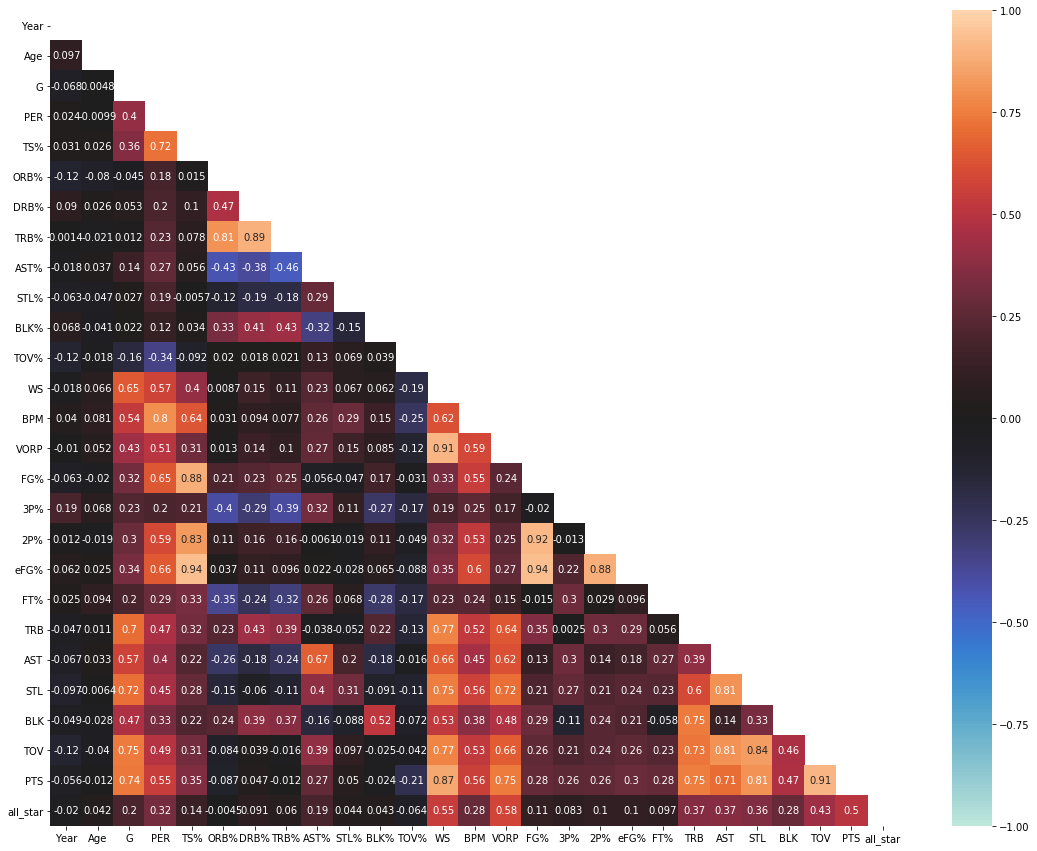

In [23]:
dataset_corr = player_data.corr()

# Plotting Heatmap with Correlations

plt.figure(figsize=(19, 15))
mask = np.zeros_like(dataset_corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(dataset_corr, mask=mask, vmin=-1, vmax=1, center=0, annot=True)

#### Graph the distibution of the 'Age' feature

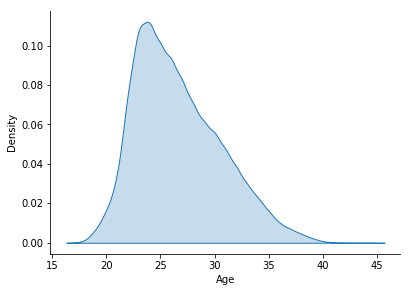

In [24]:
p = sns.displot(player_data['Age'], kind="kde", fill=True)
p.fig.set_size_inches(6, 4)

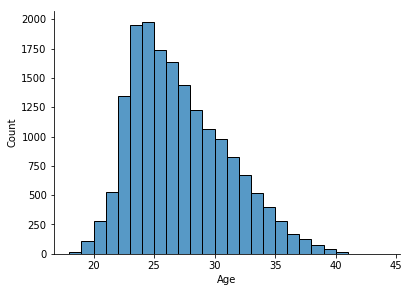

In [25]:
h = sns.displot(player_data['Age'], binwidth=1)
h.fig.set_size_inches(6, 4)

As expected, younger players have a higher probability of making the All-Star Team. The best Age seems to be around 24 - 25.

## Part 3: Classification

### Build a classifier that predicts whether or not a player makes an All-Star team based on their stats for that season

#### Feature Engineering

Creating a Dataset to do some Feature Engineering and start evaluating models.
I am excluding the `Player` variable, since the name should have no impact in making the All-Star team or not.

In [26]:
dataset = player_data.drop('Player', axis=1)
dataset.head(3)

Year Pos   Age   Tm     G   PER    TS%  ORB%  DRB%  TRB%  AST%  STL%  \
5733  1980.0  PF  22.0  SEA  67.0  12.3  0.495  10.2  18.3  14.3   5.3   1.4   
5741  1980.0  SG  23.0  POR  16.0  24.1  0.552   6.0   7.6   6.8  23.8   2.9   
5748  1980.0  PF  23.0  BOS  82.0  20.5  0.538   8.3  23.6  16.0  18.5   2.3   

      BLK%  TOV%    WS  BPM  VORP    FG%    3P%    2P%   eFG%    FT%    TRB  \
5733   4.1  20.0   1.0 -3.5  -0.3  0.450  0.000  0.450  0.450  0.673  197.0   
5741   0.5  10.9   0.9  3.3   0.3  0.493  0.421  0.504  0.521  0.718   29.0   
5748   1.0  14.0  11.2  5.3   5.4  0.474  0.406  0.481  0.494  0.836  852.0   

        AST    STL   BLK    TOV     PTS  all_star  
5733   28.0   21.0  54.0   79.0   312.0         0  
5741   31.0   14.0   2.0   20.0   180.0         0  
5748  370.0  143.0  53.0  263.0  1745.0         1

#### Removing variables with high Correlation:

In [27]:
# I will be removing Variables that have a correlation higher than 0.9. Confirming variables from heatmap:
display(dataset['TS%'].corr(dataset['eFG%'], method = 'pearson'),
        dataset['VORP'].corr(dataset['WS'], method = 'pearson'),
       dataset['2P%'].corr(dataset['FG%'], method = 'pearson'),
       dataset['eFG%'].corr(dataset['FG%'], method = 'pearson'),
       dataset['PTS'].corr(dataset['TOV'], method = 'pearson'))

0.9365314079432316

0.9096757140996321

0.9202186607706656

0.9351390844799262

0.9136775767893237

As we can see, most of these variables actually explain the same thing: Shooting Percentage.

I will remove the ones that I consider to be "semi-duplicated" based on description and correlation:

In [28]:
dataset.drop(["TS%", "FG%"], inplace=True, axis=1)

#### Handling variables with Null Values:

In [29]:
dataset.isnull().sum()

Year          0
Pos           0
Age           0
Tm            0
G             0
PER           5
ORB%          5
DRB%          5
TRB%          5
AST%          5
STL%          5
BLK%          5
TOV%         61
WS            0
BPM           0
VORP          0
3P%           0
2P%         116
eFG%         88
FT%         724
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PTS           0
all_star      0
dtype: int64

Plotting distribution of variables with Null values:

Distribution of column: PER
Distribution of column: ORB%
Distribution of column: DRB%
Distribution of column: TRB%
Distribution of column: AST%
Distribution of column: STL%
Distribution of column: BLK%
Distribution of column: TOV%
Distribution of column: 2P%
Distribution of column: eFG%
Distribution of column: FT%


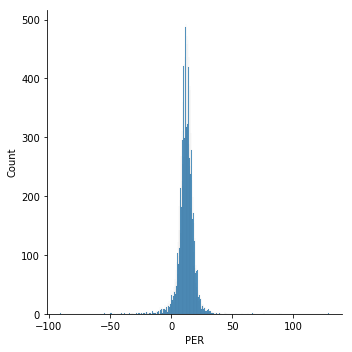

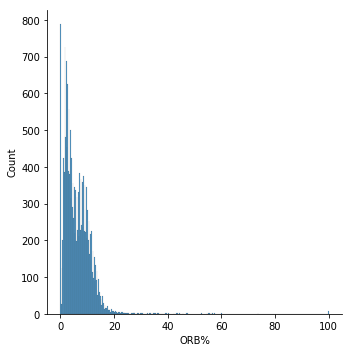

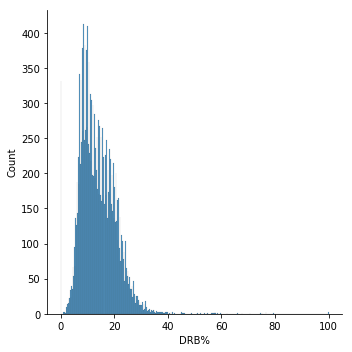

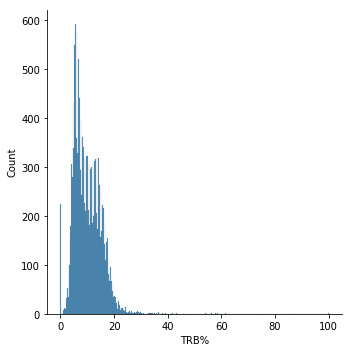

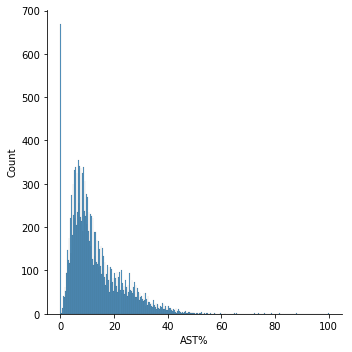

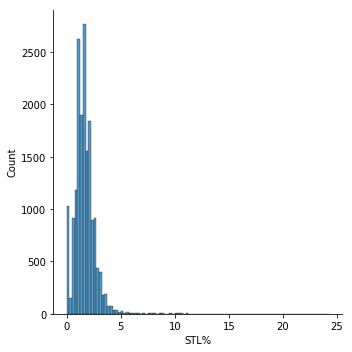

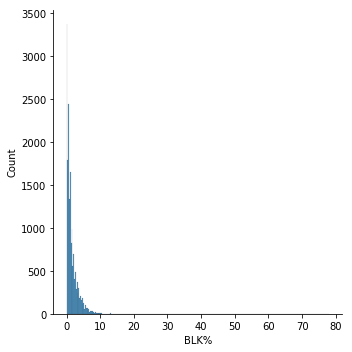

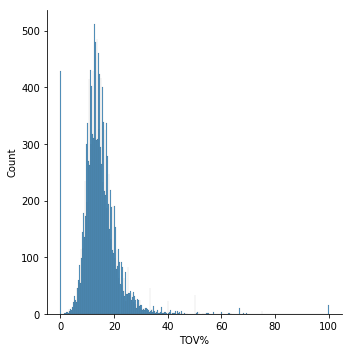

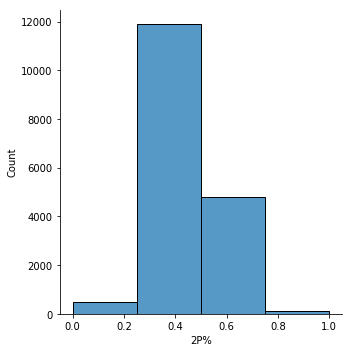

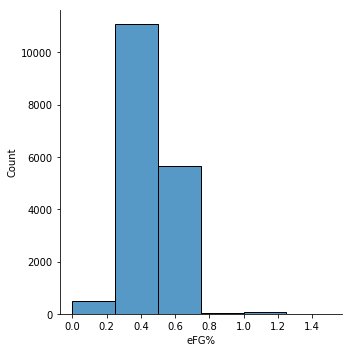

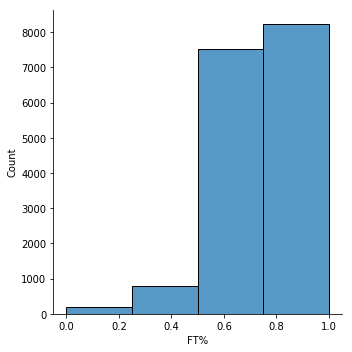

In [30]:
for (columnName, _) in dataset.iteritems():
    if dataset[columnName].isnull().sum() > 0:
        print("Distribution of column: {}".format(columnName))
        sns.displot(dataset[columnName], binwidth=0.25)

For Variables that have a normal distribution (or very similar), we will impute missing values with Mean:

In [31]:
dataset['PER'].fillna((dataset['PER'].mean()), inplace=True)
dataset['2P%'].fillna((dataset['2P%'].mean()), inplace=True)
dataset['eFG%'].fillna((dataset['eFG%'].mean()), inplace=True)

For Variables that are Skewed, we will impute missing values with Median, since the Mean is more affected by Skewness and I don't want to affect the overall distribution of the data:

In [32]:
dataset['ORB%'].fillna((dataset['ORB%'].median()), inplace=True)
dataset['DRB%'].fillna((dataset['DRB%'].median()), inplace=True)
dataset['TRB%'].fillna((dataset['TRB%'].median()), inplace=True)
dataset['AST%'].fillna((dataset['AST%'].median()), inplace=True)
dataset['STL%'].fillna((dataset['STL%'].median()), inplace=True)
dataset['BLK%'].fillna((dataset['BLK%'].median()), inplace=True)
dataset['TOV%'].fillna((dataset['TOV%'].median()), inplace=True)
dataset['FT%'].fillna((dataset['FT%'].median()), inplace=True)

#### Analyzing Outliers:

Analyzing outliers of column: Year


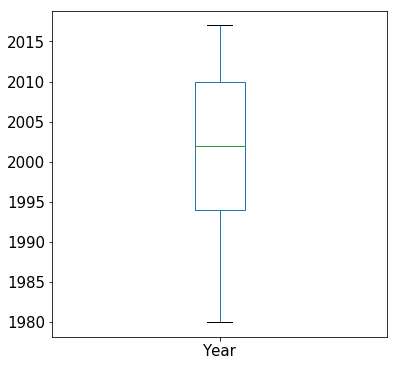

Analyzing outliers of column: Age


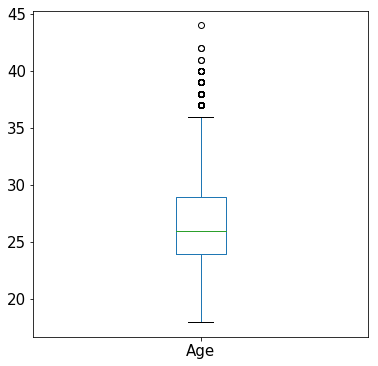

Analyzing outliers of column: G


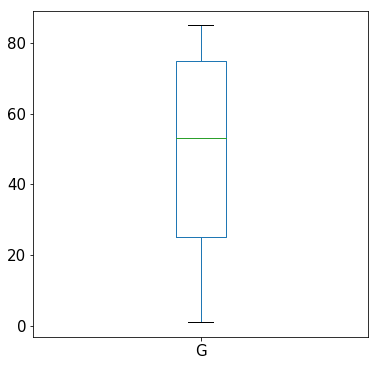

Analyzing outliers of column: PER


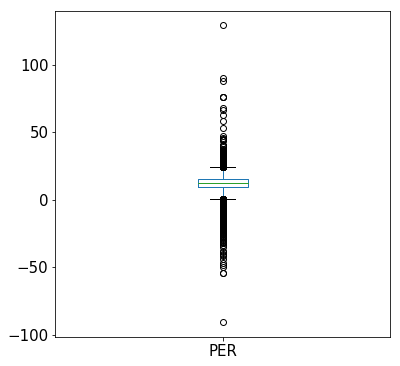

Analyzing outliers of column: ORB%


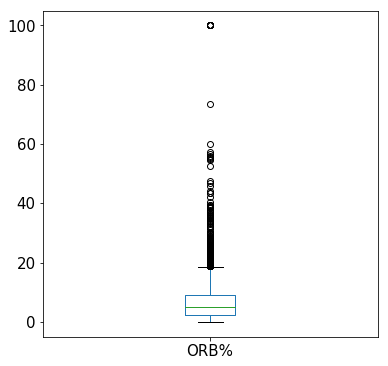

Analyzing outliers of column: DRB%


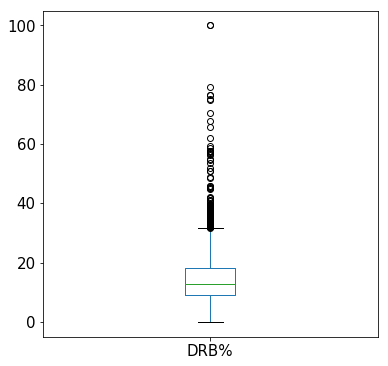

Analyzing outliers of column: TRB%


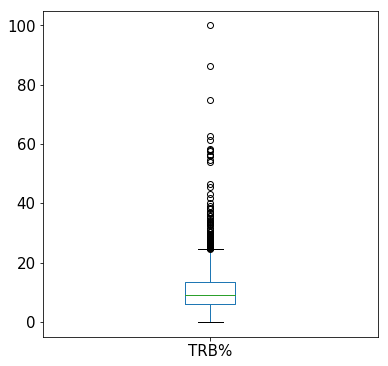

Analyzing outliers of column: AST%


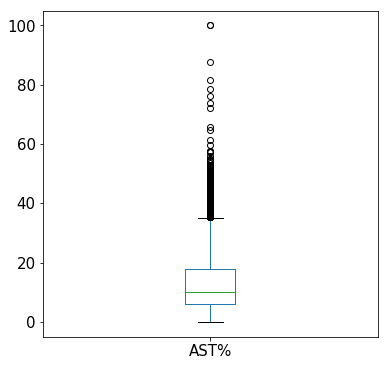

Analyzing outliers of column: STL%


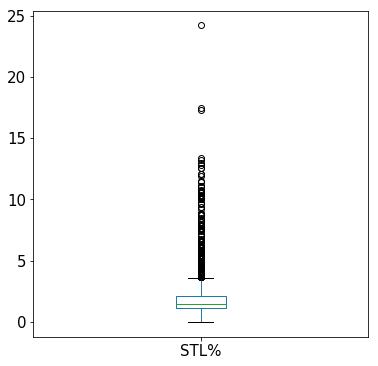

Analyzing outliers of column: BLK%


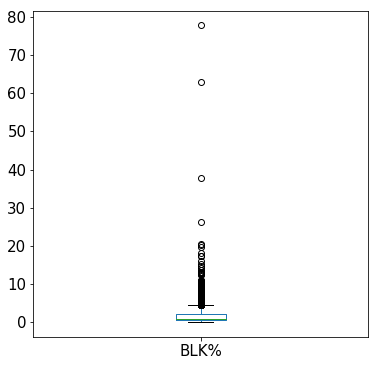

Analyzing outliers of column: TOV%


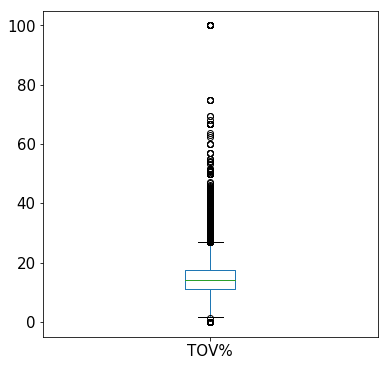

Analyzing outliers of column: WS


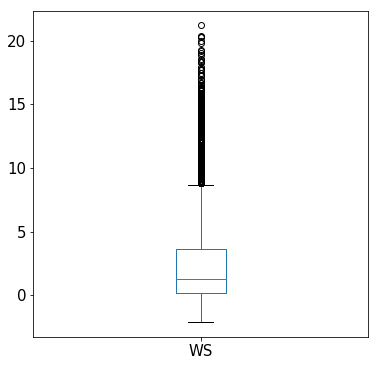

Analyzing outliers of column: BPM


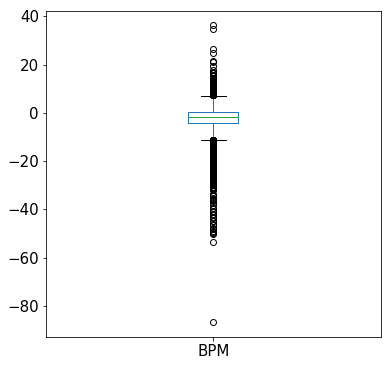

Analyzing outliers of column: VORP


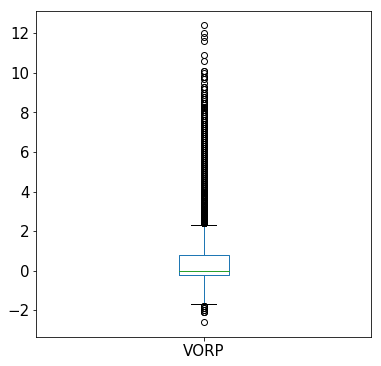

Analyzing outliers of column: 3P%


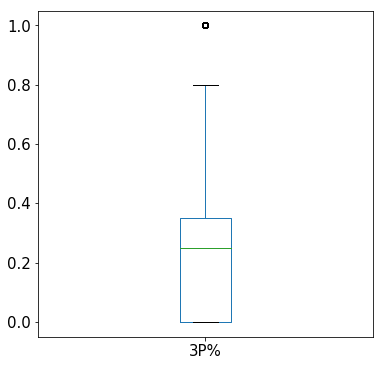

Analyzing outliers of column: 2P%


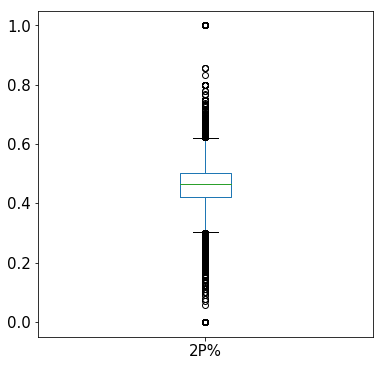

Analyzing outliers of column: eFG%


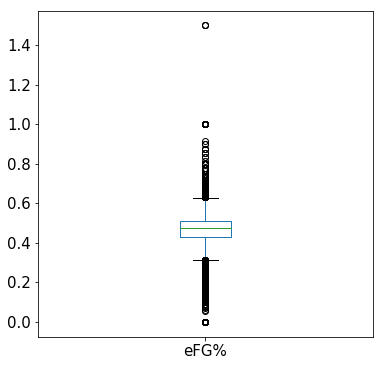

Analyzing outliers of column: FT%


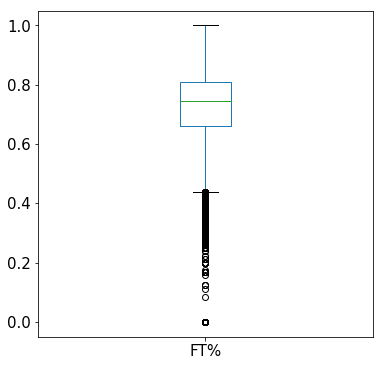

Analyzing outliers of column: TRB


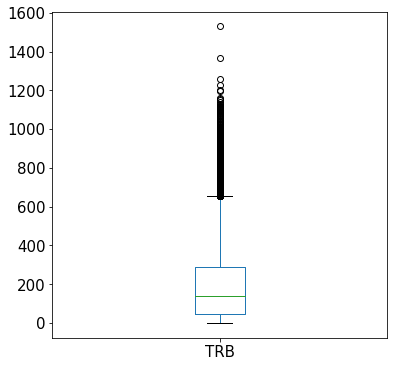

Analyzing outliers of column: AST


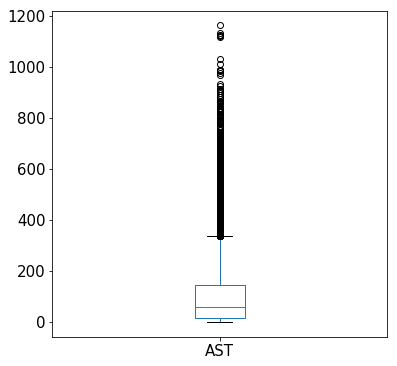

Analyzing outliers of column: STL


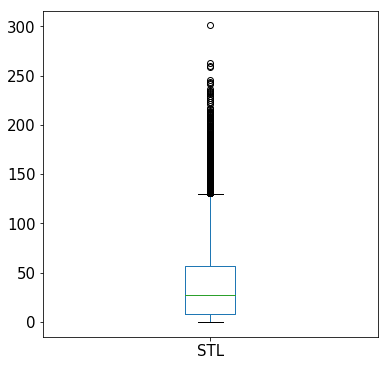

Analyzing outliers of column: BLK


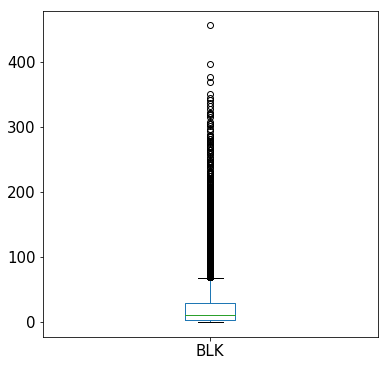

Analyzing outliers of column: TOV


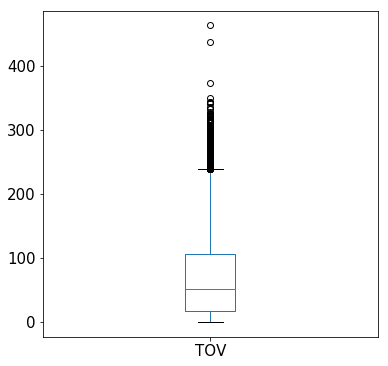

Analyzing outliers of column: PTS


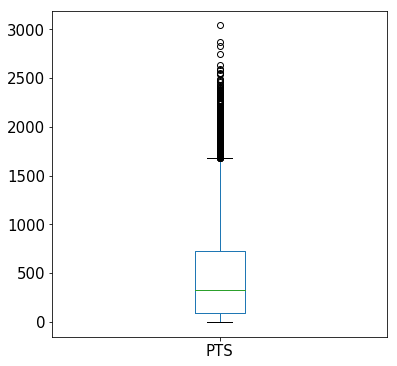

In [33]:
for (columnName, _) in dataset.iteritems():
    if (dataset[columnName].dtype in ['int64','float64'] and (columnName) not in ['all_star']):
        print("Analyzing outliers of column: {}".format(columnName))
        plt.figure(figsize=(6,6))
        dataset.boxplot([columnName], grid=False, fontsize=15)
        plt.show()

Overall, Outliers seem to be coherent and informative for our classification task, i.e. the Age of a really old player has an impact on him not making the All-Star Team, or Players with a very high Rebound Percentage have more probability of making the team. However, there seem to be a few of very extreme values that may bias or affect the training process. I will remove some of them.

In [34]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1 #range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    print("{} outliers removed".format(len(df_in)-len(df_out)))
    return df_out

In [35]:
for (columnName, _) in dataset.iteritems():
    if (dataset[columnName].dtype in ['int64','float64'] and (columnName) not in ['all_star']):
        print("{}".format(columnName))
        dataset = remove_outlier(dataset,columnName)

Year
0 outliers removed
Age
0 outliers removed
G
0 outliers removed
PER
41 outliers removed
ORB%
41 outliers removed
DRB%
17 outliers removed
TRB%
0 outliers removed
AST%
4 outliers removed
STL%
51 outliers removed
BLK%
20 outliers removed
TOV%
43 outliers removed
WS
0 outliers removed
BPM
13 outliers removed
VORP
19 outliers removed
3P%
0 outliers removed
2P%
63 outliers removed
eFG%
1 outliers removed
FT%
0 outliers removed
TRB
0 outliers removed
AST
13 outliers removed
STL
1 outliers removed
BLK
55 outliers removed
TOV
0 outliers removed
PTS
0 outliers removed


### Model Selection

Since most of our variables are Continuous, and the target variable is binary (0 or 1), **Logistic Regression** seems like a good choice for a Baseline model. 

I will Standardize and then Normalize the numeric features, and explore the best way of dealing with the only 2 categorical columns. Due to its Nominal nature, One Hot-Encoding seems like the best choice; however, we have to be carefull not to end up with a dimension problem if the variables have too many unique values.

#### Dealing with Categorical and Numeric variables

Exploring Nominal Variables `Team` and `Position`, to assess feasibility of doing One Hot Encoding:

In [36]:
display(player_data['Tm'].nunique(), player_data['Pos'].nunique())

41

15

In [37]:
categorical_cols = dataset.columns[dataset.dtypes=='object'].tolist()
numerical_cols = dataset.columns[dataset.dtypes!='object'].tolist()
numerical_cols.remove('all_star')

ohe = OneHotEncoder()
std_scaler = StandardScaler()
mms = MinMaxScaler()

# Concat the normalized numerical and dummified categorical columns:
dummified_dataset = pd.concat([pd.DataFrame(mms.fit_transform(std_scaler.fit_transform(dataset[numerical_cols])), columns=numerical_cols).reset_index(drop=True),                    
                               pd.DataFrame(ohe.fit_transform(dataset[categorical_cols]).toarray(), columns=ohe.get_feature_names(categorical_cols)).reset_index(drop=True),
                               dataset['all_star'].reset_index(drop=True)], axis=1)

In [38]:
dummified_dataset.sample(5)

Year       Age         G       PER      ORB%      DRB%      TRB%  \
6308   0.486486  0.269231  0.273810  0.491828  0.185759  0.215385  0.245714   
12728  0.810811  0.153846  0.702381  0.502229  0.043344  0.286538  0.225714   
16898  1.000000  0.500000  0.476190  0.487370  0.040248  0.173077  0.148571   
8446   0.594595  0.615385  0.011905  0.398217  0.000000  0.446154  0.331429   
5399   0.432432  0.192308  0.869048  0.542348  0.272446  0.419231  0.442857   

           AST%      STL%      BLK%      TOV%        WS       BPM      VORP  \
6308   0.174797  0.341772  0.018018  0.337864  0.124444  0.677885  0.241379   
12728  0.117886  0.164557  0.045045  0.157282  0.133333  0.603365  0.198276   
16898  0.253388  0.139241  0.018018  0.304854  0.102222  0.550481  0.189655   
8446   0.000000  0.000000  0.000000  0.000000  0.093333  0.334135  0.224138   
5399   0.066396  0.189873  0.153153  0.262136  0.262222  0.634615  0.206897   

         3P%       2P%      eFG%    FT%       TRB       AST       STL  \
6308   0.176  0.536756  0.466739  0.870  0.044444  0.039256  0.088462   
12728  0.318  0.532089  0.508179  0.795  0.064706  0.040289  0.069231   
16898  0.386  0.434072  0.487459  0.846  0.025490  0.053719  0.034615   
8446   0.500  0.000000  0.408942  0.746  0.001307  0.000000  0.000000   
5399   0.000  0.586931  0.546347  0.663  0.286928  0.047521  0.180769   

            BLK       TOV       PTS  Pos_C  Pos_C-PF  Pos_PF  Pos_PF-C  \
6308   0.004329  0.051724  0.035843    0.0       0.0     0.0       0.0   
12728  0.021645  0.053879  0.092404    0.0       0.0     0.0       0.0   
16898  0.004329  0.056034  0.046695    0.0       0.0     0.0       0.0   
8446   0.000000  0.000000  0.000987    0.0       0.0     0.0       0.0   
5399   0.155844  0.211207  0.219007    0.0       0.0     1.0       0.0   

       Pos_PF-SF  Pos_PG  Pos_PG-SF  Pos_PG-SG  Pos_SF  Pos_SF-PF  Pos_SF-SG  \
6308         0.0     0.0        0.0        0.0     1.0        0.0        0.0   
12728        0.0     0.0        0.0        0.0     0.0        0.0        0.0   
16898        0.0     1.0        0.0        0.0     0.0        0.0        0.0   
8446         0.0     0.0        0.0        0.0     0.0        0.0        0.0   
5399         0.0     0.0        0.0        0.0     0.0        0.0        0.0   

       Pos_SG  Pos_SG-PF  Pos_SG-PG  Pos_SG-SF  Tm_ATL  Tm_BOS  Tm_BRK  \
6308      0.0        0.0        0.0        0.0     0.0     0.0     0.0   
12728     1.0        0.0        0.0        0.0     0.0     0.0     0.0   
16898     0.0        0.0        0.0        0.0     0.0     0.0     0.0   
8446      1.0        0.0        0.0        0.0     0.0     0.0     0.0   
5399      0.0        0.0        0.0        0.0     0.0     0.0     0.0   

       Tm_CHA  Tm_CHH  Tm_CHI  Tm_CHO  Tm_CLE  Tm_DAL  Tm_DEN  Tm_DET  Tm_GSW  \
6308      0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
12728     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
16898     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
8446      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5399      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       Tm_HOU  Tm_IND  Tm_KCK  Tm_LAC  Tm_LAL  Tm_MEM  Tm_MIA  Tm_MIL  Tm_MIN  \
6308      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
12728     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
16898     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8446      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5399      0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   

       Tm_NJN  Tm_NOH  Tm_NOK  Tm_NOP  Tm_NYK  Tm_OKC  Tm_ORL  Tm_PHI  Tm_PHO  \
6308      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
12728     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
16898     0.0     0.0     0.0     

Exploring distribution of the target Variable `all_star`. As expected, only a small % of players (4.75%) made the All-Star team:

In [39]:
count = dummified_dataset['all_star'].value_counts()
labels = (np.array(count.index))
values = (np.array((count / count.sum())*100))
colors = ['skyblue', 'black']
layout = go.Layout(
    title='Target Distribution',
    font=dict(size=16),
    width=450,
    height=450)

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)], layout=layout)
fig.update_traces(textfont_size=18, marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

In [40]:
# Target variable count:
count

0    16274
1      752
Name: all_star, dtype: int64

### Model Scoring:

As we can see, the dataset is pretty umbalanced towards the negative class (0), and we have to keep in my mind that the objective of the model is to predict which players will be making the All Star game (1).

Training a model like this and using **Accuracy** as the evaluation metric would result in very high scores for a "useless" model. We could predict all 0's and get an Accuracy score of ~95%.

I have decided to use **F1-score** because I want to focus both, on the accuracy of my Positive predictions (1), and on covering as many positive cases in my model as possible.

#### Baseline Model:

In [41]:
target = dummified_dataset['all_star']
train = dummified_dataset.drop(['all_star'], axis=1)

In [42]:
# Train / Test Splitting
x_train, x_val, y_train, y_val = train_test_split(train,target,test_size=0.2,train_size=0.8, random_state = 0)

In [43]:
# Training and Validation
logreg = LogisticRegressionCV(cv=3, max_iter=1000, class_weight='balanced', random_state=0).fit(x_train, y_train)
y_pred = logreg.predict(x_val)
print('F1 Score:', f1_score(y_val, y_pred))

F1 Score: 0.5582329317269076


In [44]:
results_df = pd.DataFrame(columns=['Approach', 'F1-Score'])
results_df.loc[len(results_df)] = ['LR Baseline', f1_score(y_val, y_pred)]
results_df

Approach  F1-Score
0  LR Baseline  0.558233

Confusion matrix
[[ 139    9]
 [ 211 3047]]


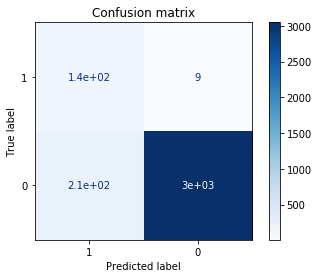

In [45]:
# Plot confusion matrix
titles_options = [("Confusion matrix", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logreg, x_val, y_val,
                                 labels=[1,0],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

As expected, the Score is low because. As we saw previously, `all_star` variable is umbalanced towards the negative class (0), and therefore the model is over-predicting it. I will try Balancing the classes, keeping in mind that OverSampling may lead to Overfitting, and UnderSampling will lead to loss of information.

In [46]:
# Class count
count_class_0, count_class_1 = dummified_dataset.all_star.value_counts()

# Divide by class
df_class_0 = dummified_dataset[dummified_dataset['all_star'] == 0]
df_class_1 = dummified_dataset[dummified_dataset['all_star'] == 1]

#### Under-sampling:

Random under-sampling:
1    752
0    752
Name: all_star, dtype: int64


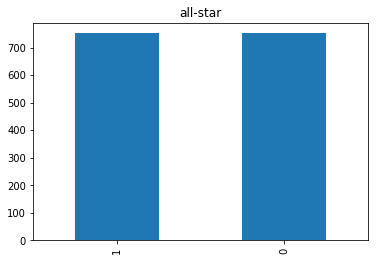

In [47]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.all_star.value_counts())

df_test_under.all_star.value_counts().plot(kind='bar', title='all-star');

In [48]:
df_test_under.shape

(1504, 81)

#### Model evaluation with Undersampling:

In [49]:
target = df_test_under['all_star']
train = df_test_under.drop(['all_star'], axis=1)

In [50]:
# Train / Test Splitting
x_train, x_val, y_train, y_val = train_test_split(train,target,test_size=0.2,train_size=0.8, random_state = 0)

In [51]:
# Training and Validation
logreg = LogisticRegressionCV(cv=3, max_iter=1000,random_state=0).fit(x_train, y_train)
y_pred = logreg.predict(x_val)
print('F1 Score:', f1_score(y_val, y_pred))

F1 Score: 0.9142857142857144


In [52]:
results_df.loc[len(results_df)] = ['LR Undersampling', f1_score(y_val, y_pred)]
results_df

Approach  F1-Score
0       LR Baseline  0.558233
1  LR Undersampling  0.914286

Confusion matrix
[[128  11]
 [ 13 149]]


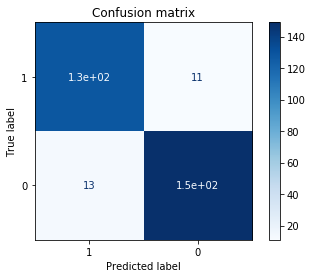

In [53]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logreg, x_val, y_val,
                                 labels=[1,0],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#### Over-sampling:

Random over-sampling:
1    16274
0    16274
Name: all_star, dtype: int64


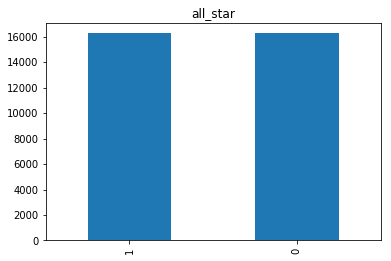

In [54]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.all_star.value_counts())

df_test_over.all_star.value_counts().plot(kind='bar', title='all_star');

In [55]:
df_test_over.shape

(32548, 81)

#### Model evaluation with Oversampling:

In [56]:
target = df_test_over['all_star']
train = df_test_over.drop(['all_star'], axis=1)

In [57]:
# Train / Test Splitting
x_train, x_val, y_train, y_val = train_test_split(train,target,test_size=0.2,train_size=0.8, random_state = 0)

In [58]:
# Training and Validation
logreg = LogisticRegressionCV(cv=3, max_iter=1000,random_state=0).fit(x_train, y_train)
y_pred = logreg.predict(x_val)
print('F1 Score:', f1_score(y_val, y_pred))

F1 Score: 0.9526936278167438


In [59]:
results_df.loc[len(results_df)] = ['LR Oversampling', f1_score(y_val, y_pred)]
results_df

Approach  F1-Score
0       LR Baseline  0.558233
1  LR Undersampling  0.914286
2   LR Oversampling  0.952694

Confusion matrix
[[3192  108]
 [ 209 3001]]


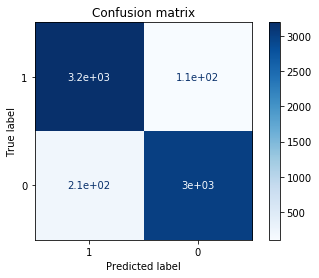

In [60]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logreg, x_val, y_val,
                                 labels=[1,0],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Conclusion:

The results for the Classification task after balancing classes seem to be very satisfying. Due to the number of variables, and the balancing techniques that I used, it is likely that the model has learned the training data and is Over-fitted, so ideally, we would have to test it with new unseen data to evaluate it properly.

I chose not to experiment with Deep Learning models because we do not seem to have enough data points. Another good option to explore furtherly would be Decision Trees algorithms, however Logistic Regression provided very good results because of the variables' nature, it is widely understood in the industry and easy to understand.